# Neural Network using TensorFlow - Keras

We will just take the `MELBOURNE_CLEANED_DATASET.csv` to be analyzed since it has been cleaned before, so we don't need to put too much effort in this modeling

### Importing all of the libraries needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

sns.set()

In [2]:
import matplotlib
print('Pandas Version: ', pd.__version__)
print('NumPy Version: ', np.__version__)
print('Matplotlib Version: ', matplotlib.__version__)
print('Seaborn Version: ', sns.__version__)
print('Scikit-Learn Version: ', sklearn.__version__)
print('TensorFlow Version: ', tf.__version__)

Pandas Version:  2.1.3
NumPy Version:  1.24.3
Matplotlib Version:  3.8.2
Seaborn Version:  0.13.0
Scikit-Learn Version:  1.3.2
TensorFlow Version:  2.12.1


## Load The Data

In [3]:
dataset = pd.read_csv('MELBOURNE_CLEANED_DATASET.csv')
dataset.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,870000.0,SS,Jellis,2016-09-03,2.5,3067.0,1.0,1.0,126.0,136.0,1970.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,1.0,1.0,202.0,136.0,1970.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,3,u,870000.0,VB,Rounds,2016-02-04,2.5,3067.0,2.0,1.0,0.0,136.0,1970.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29238 entries, 0 to 29237
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         29238 non-null  object 
 1   Rooms          29238 non-null  int64  
 2   Type           29238 non-null  object 
 3   Price          29238 non-null  float64
 4   Method         29238 non-null  object 
 5   SellerG        29238 non-null  object 
 6   Date           29238 non-null  object 
 7   Distance       29238 non-null  float64
 8   Postcode       29238 non-null  float64
 9   Bathroom       29238 non-null  float64
 10  Car            29238 non-null  float64
 11  Landsize       29238 non-null  float64
 12  BuildingArea   29238 non-null  float64
 13  YearBuilt      29238 non-null  float64
 14  CouncilArea    29238 non-null  object 
 15  Lattitude      29238 non-null  float64
 16  Longtitude     29238 non-null  float64
 17  Regionname     29238 non-null  object 
 18  Proper

## Preprocessing

In [5]:
# Since postal code can be converted as categorical data type, thus
postal = ['Postcode']

for postcode in postal:
    dataset[postcode] = dataset[postcode].astype('object')

In [6]:
dataset.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Suburb,29238,319,Reservoir,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rooms,29238.0,NaN,NaN,NaN,2.832102,0.803905,1.0,2.0,3.0,3.0,4.0
Type,29238,3,h,18954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,29238.0,NaN,NaN,NaN,939008.094227,426992.266625,85000.0,670000.0,870000.0,1075000.0,3200000.0
Method,29238,9,S,16893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SellerG,29238,351,Nelson,2850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,29238,78,2017-10-28,900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Distance,29238.0,NaN,NaN,NaN,10.732372,6.127501,0.0,6.3,10.1,13.9,35.2
Postcode,29238.0,189.0,3073.0,764.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bathroom,29238.0,NaN,NaN,NaN,1.58359,0.496084,0.0,1.0,2.0,2.0,2.0


### One Hot Encoding

In [7]:
categorical = [
    'Suburb',
    'Type',
    'Method',
    'SellerG',
    'Date',
    'Postcode',
    'CouncilArea',
    'Regionname',
]

In [8]:
dataset = dataset.copy()
for column in categorical:
    dummies = pd.get_dummies(dataset[column], dtype=int)
    dataset = pd.concat([dataset, dummies], axis=1)
    dataset = dataset.drop(column, axis=1)

In [9]:
dataset.head()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,...,Yarra Ranges Shire Council,Eastern Metropolitan,Eastern Victoria,MV,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,2,870000.0,2.5,1.0,1.0,126.0,136.0,1970.0,-37.8014,144.9958,...,0,0,0,0,1,0,0,0,0,0
1,2,1480000.0,2.5,1.0,1.0,202.0,136.0,1970.0,-37.7996,144.9984,...,0,0,0,0,1,0,0,0,0,0
2,2,1035000.0,2.5,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,...,0,0,0,0,1,0,0,0,0,0
3,3,870000.0,2.5,2.0,1.0,0.0,136.0,1970.0,-37.8114,145.0116,...,0,0,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,...,0,0,0,0,1,0,0,0,0,0


## Dependent and Independent Variables

Our target is `Price`, while our input is other features

In [10]:
target = dataset['Price']
inputs = dataset.drop(['Price'], axis=1)

In [11]:
# Scaling using Z-Score (StandardScaler)
scaler = StandardScaler()

In [12]:
inputs.columns = inputs.columns.astype(str)

In [13]:
inputs = pd.DataFrame(scaler.fit_transform(inputs), columns=inputs.columns)
inputs.head()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,...,Yarra Ranges Shire Council,Eastern Metropolitan,Eastern Victoria,MV,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,-1.035093,-1.343535,-1.176413,-0.083979,-1.383522,0.050190,0.105071,-0.591059,0.591358,-0.79867,...,-0.052707,-0.372404,-0.063385,-0.008271,1.55129,-0.061732,-0.211422,-0.703844,-0.499433,-0.055567
1,-1.035093,-1.343535,-1.176413,-0.083979,-1.070667,0.050190,0.105071,-0.590950,0.591399,-0.79867,...,-0.052707,-0.372404,-0.063385,-0.008271,1.55129,-0.061732,-0.211422,-0.703844,-0.499433,-0.055567
2,-1.035093,-1.343535,-1.176413,-1.185543,-1.260026,-1.732946,-2.798161,-0.591451,0.591321,-0.79867,...,-0.052707,-0.372404,-0.063385,-0.008271,1.55129,-0.061732,-0.211422,-0.703844,-0.499433,-0.055567
3,0.208857,-1.343535,0.839409,-0.083979,-1.902202,0.050190,0.105071,-0.591662,0.591607,-0.79867,...,-0.052707,-0.372404,-0.063385,-0.008271,1.55129,-0.061732,-0.211422,-0.703844,-0.499433,-0.055567
4,0.208857,-1.343535,0.839409,-1.185543,-1.350590,0.488153,-2.798161,-0.591536,0.591336,-0.79867,...,-0.052707,-0.372404,-0.063385,-0.008271,1.55129,-0.061732,-0.211422,-0.703844,-0.499433,-0.055567


## Train Test Split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size= 0.2, random_state = 42)

## Neural Network

In [15]:
model = Sequential()

In [16]:
# Rectified Linear Unit (RELU)
model.add(Dense(128, input_dim = 998, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output Layer
model.add(Dense(1, activation='linear'))

In [17]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               127872    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 136,193
Trainable params: 136,193
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
731/731 [==============================] - 2s 2ms/step - loss: 996290134016.0000 - mae: 904459.2500 - val_loss: 787849609216.0000 - val_mae: 798616.0625
Epoch 2/100
731/731 [==============================] - 1s 2ms/step - loss: 449912111104.0000 - mae: 552221.2500 - val_loss: 226920939520.0000 - val_mae: 369650.2500
Epoch 3/100
731/731 [==============================] - 1s 2ms/step - loss: 186068074496.0000 - mae: 323837.7812 - val_loss: 164365254656.0000 - val_mae: 294905.0938
Epoch 4/100
731/731 [==============================] - 1s 2ms/step - loss: 154505216000.0000 - mae: 283734.9688 - val_loss: 148163215360.0000 - val_mae: 273472.4062
Epoch 5/100
731/731 [==============================] - 1s 2ms/step - loss: 142526726144.0000 - mae: 268125.5000 - val_loss: 140647743488.0000 - val_mae: 262363.0625
Epoch 6/100
731/731 [==============================] - 2s 3ms/step - loss: 135785373696.0000 - mae: 259303.6562 - val_loss: 135948902400.0000 - val_mae: 256595.2188
Epoch 7/10

## Plotting the Training Loss, Validation Loss, and Accuracy

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

<function matplotlib.pyplot.show(close=None, block=None)>

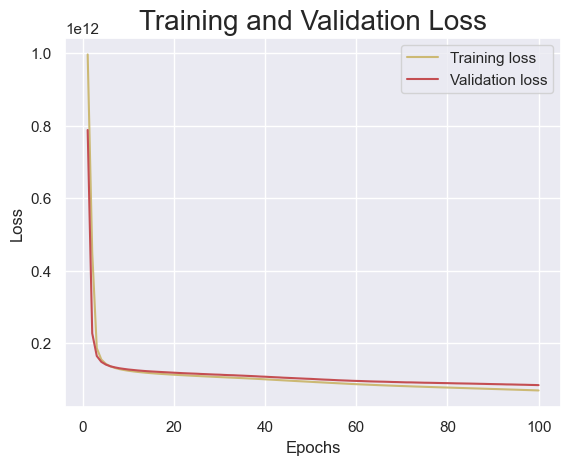

In [20]:
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss', fontsize = 20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

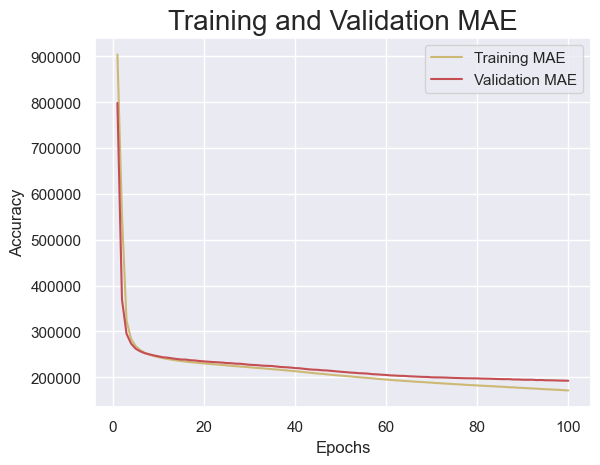

In [21]:
acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and Validation MAE', fontsize = 20)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show

As you can see the error of this model is decreased pretty fast. But how do we compare it with our MLR?

## Prediction

In [27]:
predictions = model.predict(x_test[:5])
print("Predicted Values: ", predictions)
print("\n\nActual Values: ", y_test[:5])

1/1 [==============================] - 0s 30ms/step
Predicted Values:  [[ 330009.78 ]
 [1047199.3  ]
 [ 860664.56 ]
 [ 489561.97 ]
 [   7318.636]]


Actual Values:  12547     985000.0
963      1425000.0
28609     920000.0
1412      502000.0
15961     870000.0
Name: Price, dtype: float64


## Evaluation

### Accuracy

In [28]:
mse_neural, mae_neural = model.evaluate(x_test, y_test)
print("MSE  : ", mse_neural)
print("MAE  : ", mae_neural)
print("RMSE : ", np.sqrt(mse_neural))

183/183 [==============================] - 0s 1ms/step - loss: 84018888704.0000 - mae: 192391.4219
MSE  :  84018888704.0
MAE  :  192391.421875
RMSE :  289860.11920234904


### R-Squared

In [22]:
from sklearn.metrics import r2_score

In [23]:
y_true = np.array(y_test)
y_pred = np.array(model.predict(x_test))

183/183 [==============================] - 0s 819us/step


In [24]:
r2_score(y_true, y_pred)

0.5237713739630026

# Results

The accuracy of this model is way better than that of multiple linear regression. It happens because of the non-linearity of the data, which indicates that it has a better fit to the data.

As you can see, although the R-Squared of the Nerual Network is lower than the MLR, the performance (Root of Mean Squared Error, or RMSE) implies that this model performs way better than the MLR.

**Keep in mind that the R-Squared is not a reliable measure of model performance, as it can be inflated by adding more variables or layers to the model.**

However, we could improve this performance by modifying the density of the model, such as by adding dense dropout layers to reduce overfitting.